### CPSC 390 Project 4 -- Perceptron learning

### Your Name: Caden Goodwin


In [26]:
# DO NOT modify this section
import numpy as np
from sklearn.metrics import accuracy_score

# set up training data and label
X_train=np.array([[1, 1], [3, 2], [2,4], [3, 4], [2,3]])
y_label=np.array([0,1,1,1,0],dtype=int)

# set up initial weight
init_weights = np.array([[0,1,-1]],dtype=float)
init_weights=init_weights.T

# Example of using sklearn accuracy_score
# -- you will populate the y_predicted array based on your perceptron with its updated weights
y_predicted=np.array([0,0,0,0,0],dtype=int)
print('Accuracy score: {}'.format(accuracy_score(y_label, y_predicted)))


Accuracy score: 0.4


In [27]:
# Your code for the perceptron learning function with a constant learning rate of 1 and the prediction function using your perceptron
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# augment X_train with bias term
X_augmented = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # shape (5,3)

def perceptron_learning(X, y, w_init, learning_rate=1, max_iter=100):
    w = w_init.copy()
    n_samples = X.shape[0]
    accuracy_list = []
    weights_list = []
    for iter in range(max_iter):
        for i in range(n_samples):
            xi = X[i]
            yi = y[i]
            activation = np.dot(w.T, xi)
            y_hat = 1 if activation >= 0 else 0
            if y_hat != yi:
                # Update weights
                w = w + learning_rate * (yi - y_hat) * xi.reshape(-1,1)
        # Compute predictions and accuracy
        y_pred = []
        for i in range(n_samples):
            xi = X[i]
            activation = np.dot(w.T, xi)
            y_hat = 1 if activation >= 0 else 0
            y_pred.append(y_hat)
        acc = accuracy_score(y, y_pred)
        accuracy_list.append(acc)
        weights_list.append(w.copy())
    return accuracy_list, weights_list


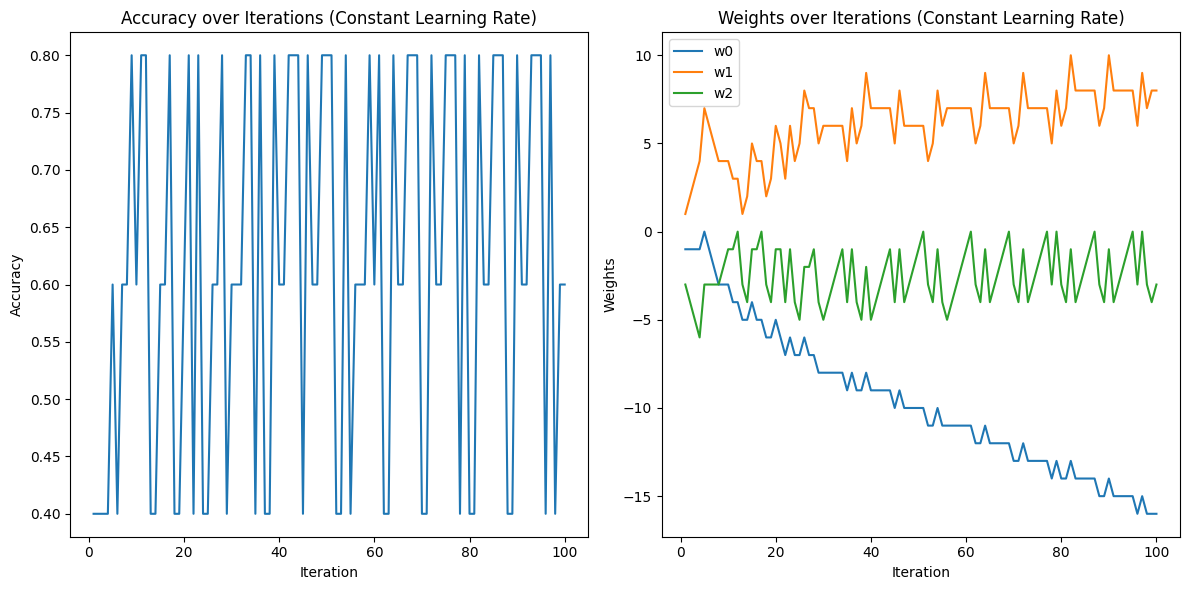

In [28]:
# Your code for calling the perceptron learning, prediction, evaluation for 100 iterations and do the plots

#Perceptron learning with constant learning rate
accuracy_list, weights_list = perceptron_learning(X_augmented, y_label, init_weights, learning_rate=1, max_iter=100)

#Plotting the accuracy_score and each of the three weights over the 100 iterations
iterations = range(1, 101)

#Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(iterations, accuracy_list)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations (Constant Learning Rate)')

# weights
w0 = [w[0, 0] for w in weights_list]
w1 = [w[1, 0] for w in weights_list]
w2 = [w[2, 0] for w in weights_list]

# Plot weights
plt.subplot(1, 2, 2)
plt.plot(iterations, w0, label='w0')
plt.plot(iterations, w1, label='w1')
plt.plot(iterations, w2, label='w2')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Weights over Iterations (Constant Learning Rate)')
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
# Your code for the improved perceptron learning
# (or you can add a decay option to your earlier implementation.  If you do so, make sure the previous code still works )

#Perceptron learning with decaying learning rate

def perceptron_learning_decay(X, y, w_init, c=10, max_iter=100):
    w = w_init.copy()
    n_samples = X.shape[0]
    accuracy_list = []
    weights_list = []
    for iter in range(1, max_iter + 1):
        learning_rate = c / (iter + c)
        for i in range(n_samples):
            xi = X[i]
            yi = y[i]
            activation = np.dot(w.T, xi)
            y_hat = 1 if activation >= 0 else 0
            if y_hat != yi:
                #Update the weights
                w = w + learning_rate * (yi - y_hat) * xi.reshape(-1, 1)
        # After updating weights over all samples compute predictions and accuracy
        y_pred = []
        for i in range(n_samples):
            xi = X[i]
            activation = np.dot(w.T, xi)
            y_hat = 1 if activation >= 0 else 0
            y_pred.append(y_hat)
        acc = accuracy_score(y, y_pred)
        accuracy_list.append(acc)
        weights_list.append(w.copy())
    return accuracy_list, weights_list



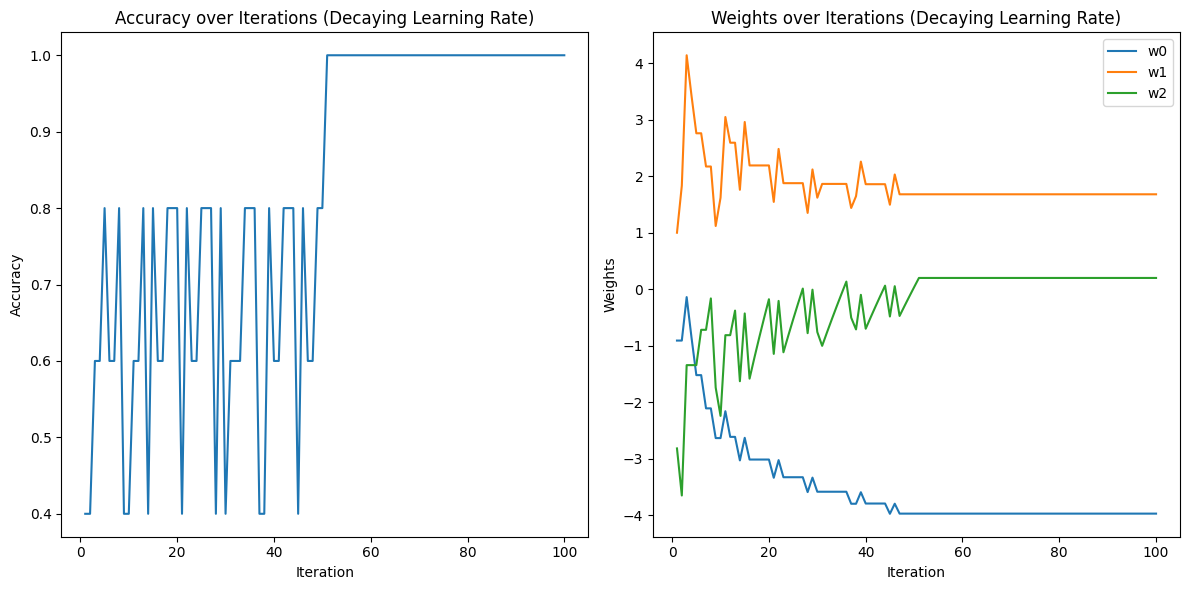

In [30]:
# Your code for calling the improved perceptron learning, prediction, evaluation for 100 iterations and do the plots

#perceptron learning with decaying learning rate
c_value = 10
accuracy_list_decay, weights_list_decay = perceptron_learning_decay(X_augmented, y_label, init_weights, c=c_value, max_iter=100)

#Plot accuracy_score and each of the three weights over the 100 iterations for decaying learning rate
iterations = range(1, 101)

#Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(iterations, accuracy_list_decay)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations (Decaying Learning Rate)')

#Extract weights
w0_decay = [w[0, 0] for w in weights_list_decay]
w1_decay = [w[1, 0] for w in weights_list_decay]
w2_decay = [w[2, 0] for w in weights_list_decay]

#Plot weights
plt.subplot(1, 2, 2)
plt.plot(iterations, w0_decay, label='w0')
plt.plot(iterations, w1_decay, label='w1')
plt.plot(iterations, w2_decay, label='w2')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Weights over Iterations (Decaying Learning Rate)')
plt.legend()
plt.tight_layout()
plt.show()



### Discuss how you chose the constant to decay the learning rate and what you learned in the process.


- **Started with smaller c values (e.g., c = 1):**
  - Learning rate decayed too quickly.
  - Perceptron failed to converge within 100 iterations.

- **Incrementally increased c (e.g., c = 5, c = 10):**
  - Slowed down the decay of the learning rate.
  - Allowed for more significant weight updates early on.

- **Selected c = 10:**
  - Achieved convergence within 100 iterations.
  - Balanced initial learning rate and decay rate effectively.

- **Lessons Learned:**
  - Larger c values slow the decay of the learning rate.
  - Critical for enabling convergence on this dataset within limited iterations.
  - Tuning c is essential for the perceptron's performance.



In [31]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

fig, ax = plt.subplots()

#plot the data points
colors = ['red' if label == 0 else 'blue' for label in y_label]
ax.scatter(X_train[:, 0], X_train[:, 1], c=colors)

line, = ax.plot([], [], 'k-', linewidth=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    w = weights_list_decay[i]
    w0, w1, w2 = w[0, 0], w[1, 0], w[2, 0]
    #Avoids div by zero
    if w2 == 0:
        x_vals = np.array([np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1])
        y_vals = - (w0 + w1 * x_vals) / 1e-6
    else:
        x_vals = np.array([np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1])
        y_vals = - (w0 + w1 * x_vals) / w2
    line.set_data(x_vals, y_vals)
    ax.set_title(f'Iteration {i + 1}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=100, init_func=init, blit=False, interval=200)

plt.close(fig)

HTML(ani.to_jshtml())


Accuracies

In [32]:
#final accuracy
final_accuracy_constant = accuracy_list[-1]
print(f'Final Accuracy with Constant Learning Rate: {final_accuracy_constant}')


Final Accuracy with Constant Learning Rate: 0.6


In [33]:
#final weights
final_weights_constant = weights_list[-1]

#Get predictions on the training data
y_pred_final_constant = []
for xi in X_augmented:
    activation = np.dot(final_weights_constant.T, xi)
    y_hat = 1 if activation >= 0 else 0
    y_pred_final_constant.append(y_hat)

#accuracy score
final_accuracy_constant = accuracy_score(y_label, y_pred_final_constant)
print(f'Final Accuracy with Constant Learning Rate: {final_accuracy_constant}')


Final Accuracy with Constant Learning Rate: 0.6


In [34]:
#final accuracy
final_accuracy_decay = accuracy_list_decay[-1]
print(f'Final Accuracy with Decaying Learning Rate: {final_accuracy_decay}')


Final Accuracy with Decaying Learning Rate: 1.0


In [35]:
#final weights
final_weights_decay = weights_list_decay[-1]

#predictions on the training data
y_pred_final_decay = []
for xi in X_augmented:
    activation = np.dot(final_weights_decay.T, xi)
    y_hat = 1 if activation >= 0 else 0
    y_pred_final_decay.append(y_hat)

#Accuracy
final_accuracy_decay = accuracy_score(y_label, y_pred_final_decay)
print(f'Final Accuracy with Decaying Learning Rate: {final_accuracy_decay}')


Final Accuracy with Decaying Learning Rate: 1.0
